<a href="https://colab.research.google.com/github/kjxeez/machine-learning/blob/main/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ЛР 3, вариант 10 


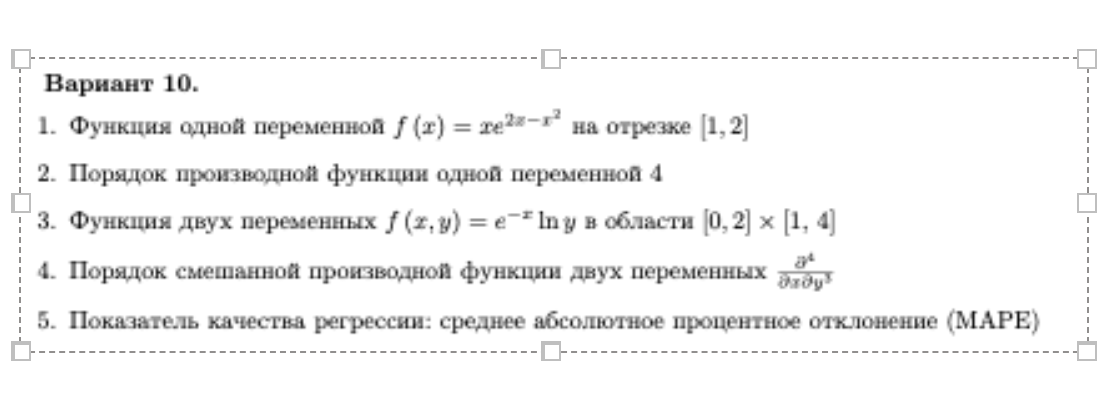

В соответствии с индивидуальным заданием, указанным в записной книжке команды, выполните следующие работы:

1.    Постройте тензор ранга 1 (вектор) со значениями заданной в индивидуальном задании функции одной переменной на заданном в индивидуальном задании отрезке и определите максимальное и минимальное значения функции.

2.    Постройте график функции с прямыми, соответствующими максимальному и минимальному значениям, подписывая оси и рисунок и создавая легенду.

3.    Найдите значения производной от функции порядка, указанного в индивидуальном задании, и постройте график полученной функции, подписывая оси и рисунок.

4.    Постройте тензор ранга 2 (матрицу) со значениями заданной в индивидуальном задании функции двух переменных на заданном в индивидуальном задании прямоугольнике и определите максимальное и минимальное значения функции.

5.    Постройте 3d график поверхности функции двух переменных, подписывая оси и рисунок.

6.    Найдите значения смешанной производной от функции порядка, указанного в индивидуальном задании, и постройте 3d график поверхности полученной функции, подписывая оси и рисунок.

7.    Решите задачу парной линейной регрессии при помощи модели TensorFlow, рассматривая тензор ранга 1 из пункта 1 задания как значения зависимой переменной (отклика), а точки отрезка из индивидуального задания как значения независимой переменной (предиктора). Оцените качество полученной модели по показателю качества регрессии, указанному в индивидуальном задании. Количество эпох, скорость обучения и начальные значения весов выберите самостоятельно, обеспечивая сходимость итерационной процедуры.

8.    Постройте кривую обучения для показателя качества регрессии, указанного в индивидуальном задании, с зависимостью от количества эпох. Показатель качества регрессия реализуйте как функцию с использованием функций модуля tf.math. 

9.    Изобразите на графике точки набора данных (независимой и зависимой переменных) и линию построенной парной регрессии, подписывая оси и рисунок и создавая легенду.

# __Постройте тензор ранга 1 (вектор) со значениями заданной в индивидуальном задании функции одной переменной на заданном в индивидуальном задании отрезке и определите максимальное и минимальное значения функции. xe^(2x-x^2) [1,2]__

In [1]:
import tensorflow as tf
import numpy as np
import random
x=np.random.uniform(1, 2, [1, 100])
x=np.append(x,[1,2])
x.sort()
x = tf.constant([x], dtype=tf.float32)
@tf.function
def f(x):
    return x * (tf.exp(2 * x - tf.pow(x, 2)))
with tf.GradientTape(persistent=True) as tape:
  tape.watch(x)
  f = f(x)

f

<tf.Tensor: shape=(1, 102), dtype=float32, numpy=
array([[2.7182817, 2.7506492, 2.7930446, 2.8155396, 2.836922 , 2.8387876,
        2.9175124, 2.964243 , 2.9856021, 2.9871874, 3.0103638, 3.0775852,
        3.0930521, 3.1017294, 3.1049604, 3.1059353, 3.131569 , 3.1324148,
        3.1615443, 3.1648657, 3.1739001, 3.175603 , 3.2032797, 3.2050097,
        3.2072406, 3.2104867, 3.2142708, 3.2220006, 3.223878 , 3.2277923,
        3.2319055, 3.2337284, 3.239339 , 3.2399917, 3.240148 , 3.241539 ,
        3.2442963, 3.246484 , 3.2471836, 3.247647 , 3.2473037, 3.2461848,
        3.2381942, 3.2342083, 3.2319548, 3.2271469, 3.2267008, 3.225255 ,
        3.2239852, 3.2231286, 3.211117 , 3.1955645, 3.1787136, 3.1759279,
        3.1741633, 3.1730676, 3.149878 , 3.147426 , 3.1318567, 3.1209216,
        3.1170511, 3.098049 , 3.043029 , 3.0321238, 3.0259786, 2.9886284,
        2.9845808, 2.9835184, 2.9497821, 2.9092524, 2.8682778, 2.83317  ,
        2.8163075, 2.789494 , 2.7022657, 2.6884427, 2.6515195,

In [2]:
maxx=tf.reduce_max(f)
maxx

<tf.Tensor: shape=(), dtype=float32, numpy=3.247647>

In [3]:
minn=tf.reduce_min(f)
minn

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

# __Постройте график функции с прямыми, соответствующими максимальному и минимальному значениям, подписывая оси и рисунок и создавая легенду.__



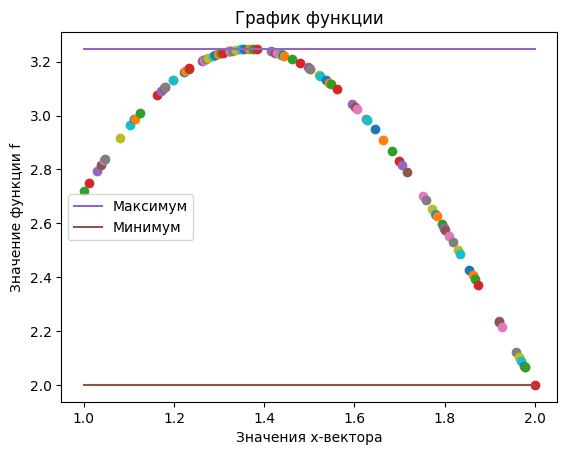

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(x, f)
ax.plot(x.numpy(), f.numpy(), 'o')
# Добавляем прямые, соответствующие максимальному и минимальному значению функции
ax.plot([1, 2], [maxx, maxx], label='Максимум')
ax.plot([1, 2], [minn, minn], label='Минимум')

# Добавляем подписи осей, заголовок и легенду
ax.set_xlabel('Значения x-вектора')
ax.set_ylabel('Значение функции f')
ax.set_title('График функции')
ax.legend()
plt.show()

# __Найдите значения производной от функции порядка, указанного в индивидуальном задании, и постройте график полученной функции, подписывая оси и рисунок.__

порядок - 4

In [5]:
x=np.random.uniform(1, 2, [1, 100])
x=np.append(x,[1,2])
x.sort()
x = tf.constant([x], dtype=tf.float32)
@tf.function
def f(x):
    return x * (tf.exp(2 * x - tf.pow(x, 2)))
with tf.GradientTape(persistent=True) as tape1:
  tape1.watch(x)
  with tf.GradientTape(persistent=True) as tape2:
    tape2.watch(x)
    with tf.GradientTape(persistent=True) as tape3:
      tape3.watch(x)
      with tf.GradientTape(persistent=True) as tape4:  
        tape4.watch(x)
        f = f(x)
      dydx = tape4.gradient(f, x)    
    d2ydx2 =tape3.gradient(dydx, x)  
  d3ydx3=tape2.gradient(d2ydx2, x) 
d4ydx4 =tape1.gradient(d3ydx3, x)  

print('dy/dx =', dydx)
print('d2y/dx2 =', d2ydx2)
print('d3y/dx3 =', d3ydx3)
print('d4y/dx4 =', d4ydx4)


dy/dx = tf.Tensor(
[[ 2.7182817   2.6828082   2.5374913   2.5279617   2.4377425   2.3771863
   2.2476332   2.1708052   2.1483626   2.1193662   2.1025612   2.062536
   2.035323    1.7548809   1.6211743   1.5701284   1.5349855   1.4610028
   1.3543916   1.2907581   1.2869687   1.2651753   1.2437387   1.1999555
   1.1451797   1.1299458   0.9489298   0.8631277   0.8198695   0.80162525
   0.7599101   0.60295725  0.5801625   0.31093693  0.28642082  0.22268438
   0.10842657  0.10076571  0.06084728 -0.0521183  -0.19222403 -0.3375845
  -0.57720804 -0.6877394  -0.78276587 -0.8101206  -0.86230993 -1.0400972
  -1.2554379  -1.3242021  -1.3512521  -1.5051208  -1.5735488  -1.5786157
  -1.6143231  -1.6195469  -1.6730437  -1.7127433  -1.7180829  -1.7282591
  -1.7299457  -1.7655153  -1.7803802  -1.8773704  -2.064395   -2.0714588
  -2.07553    -2.095479   -2.1394477  -2.1438384  -2.1583743  -2.1763716
  -2.204495   -2.2060952  -2.2314677  -2.2527986  -2.462659   -2.4888563
  -2.5576177  -2.651668   -2.68

похоже на правду, я проверила вручную

Text(0.5, 1.0, 'График функции')

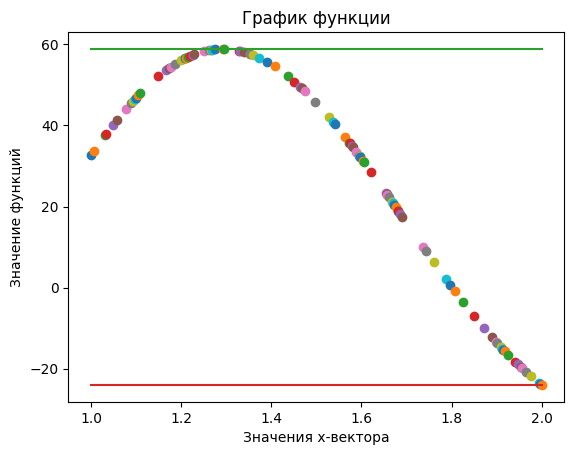

In [6]:
maxx = tf.reduce_max(d4ydx4)
minn = tf.reduce_min(d4ydx4)

fig, ax = plt.subplots()

line_down = ax.plot(x, d4ydx4.numpy(), 'o', label='Производная 4 степени')


# Добавляем прямые, соответствующие максимальному и минимальному значению функции
ax.plot([1, 2], [maxx, maxx], label='Максимум')
ax.plot([1, 2], [minn, minn], label='Минимум')

# Добавляем подписи осей, заголовок и легенду
ax.set_xlabel('Значения x-вектора')
ax.set_ylabel('Значение функций')
ax.set_title('График функции')
#ax.legend()

In [7]:
del tape

# __Постройте тензор ранга 2 (матрицу) со значениями заданной в индивидуальном задании функции двух переменных на заданном в индивидуальном задании прямоугольнике и определите максимальное и минимальное значения функции.  [0,2][1,4]__

In [8]:
x=np.random.uniform(0, 2, [1, 70])
y=np.random.uniform(1, 4, [1, 70])
x=np.append(x,[0,2])
y=np.append(y,[1,4])
x.sort()
y.sort()
x = tf.constant([x], dtype=tf.float32)
y = tf.constant([y], dtype=tf.float32)
x, y = tf.meshgrid(x, y)
@tf.function
def f(x,y):
    return tf.exp(-x)*tf.math.log(y)


In [9]:
tf.reduce_max(f(x,y))

<tf.Tensor: shape=(), dtype=float32, numpy=1.3862944>

In [10]:
tf.reduce_min(f(x,y))

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

# __Постройте 3d график поверхности функции двух переменных, подписывая оси и рисунок.__

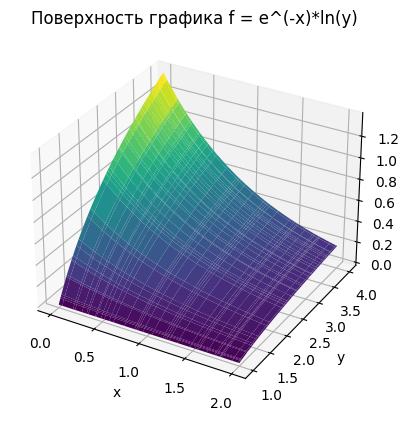

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, f(x,y), cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Поверхность графика f = e^(-x)*ln(y)')
plt.show()

# __Найдите значения смешанной производной от функции порядка, указанного в индивидуальном задании, и постройте 3d график поверхности полученной функции, подписывая оси и рисунок.__
d4/dxdy3

In [12]:
with tf.GradientTape(persistent=True) as tape4:
  tape4.watch(y)
  with tf.GradientTape(persistent=True) as tape3:
    tape3.watch(y)
    with tf.GradientTape(persistent=True) as tape2:
      tape2.watch(y)
      with tf.GradientTape(persistent=True) as tape1:
        tape1.watch(x)
        f=f(x,y)
      dfdx = tape1.gradient(f, x)
    dfdxdy = tape2.gradient(dfdx, y)
  dfdxdy2 = tape3.gradient(dfdxdy, y)
dfdxdy3 = tape4.gradient(dfdxdy2, y)
dfdxdy3

<tf.Tensor: shape=(72, 72), dtype=float32, numpy=
array([[-1.9999996 , -1.9486129 , -1.9189277 , ..., -0.28077552,
        -0.27465242, -0.2706705 ],
       [-1.937396  , -1.8876178 , -1.8588618 , ..., -0.27198675,
        -0.26605532, -0.26219803],
       [-1.7447709 , -1.6999419 , -1.6740448 , ..., -0.24494454,
        -0.23960283, -0.23612906],
       ...,
       [-0.0350157 , -0.03411603, -0.03359631, ..., -0.00491578,
        -0.00480857, -0.00473886],
       [-0.03228871, -0.0314591 , -0.03097985, ..., -0.00453294,
        -0.00443409, -0.0043698 ],
       [-0.03124999, -0.03044708, -0.02998324, ..., -0.00438712,
        -0.00429144, -0.00422923]], dtype=float32)>

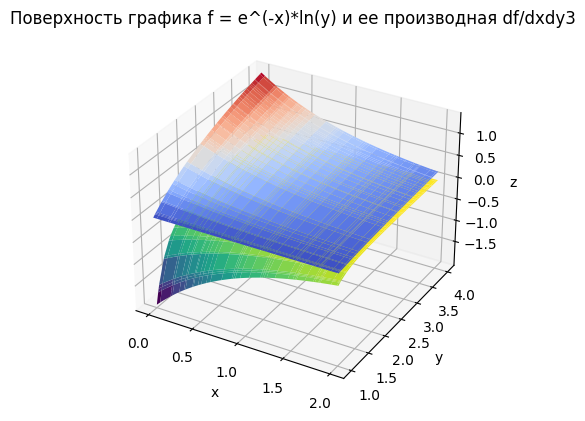

In [13]:

# Plot the surfaces
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, f.numpy(), cmap='coolwarm')
ax.plot_surface(x, y, dfdxdy3.numpy(), cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Поверхность графика f = e^(-x)*ln(y) и ее производная df/dxdy3')
plt.show()

In [14]:
del tape1
del tape2
del tape3
del tape4

# __Решите задачу парной линейной регрессии при помощи модели TensorFlow, рассматривая тензор ранга 1 из пункта 1 задания как значения зависимой переменной (отклика), а точки отрезка из индивидуального задания как значения независимой переменной (предиктора). Оцените качество полученной модели по показателю качества регрессии, указанному в индивидуальном задании. Количество эпох, скорость обучения и начальные значения весов выберите самостоятельно, обеспечивая сходимость итерационной процедуры.__
mape

In [112]:

x=np.random.uniform(1, 2, [1, 100])
x=np.append(x,[1,2])
x.sort()
x_train = tf.constant([x], dtype=tf.float32)
@tf.function
def f(x):
    return x * (tf.exp(2 * x - tf.pow(x, 2)))
with tf.GradientTape(persistent=True) as tape:
  tape.watch(x_train)
  y_train = f(x_train)


In [113]:
def mape(y_test, pred):
   
    mape = tf.reduce_mean(tf.abs((y_test - pred) / y_test))
    return mape

In [114]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = mape(model(inputs), outputs)
  dw, db = t.gradient(current_loss, [model.w, model.b])
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

  return current_loss

In [117]:
class Model(object):
  def __init__(self):
    # Инициализируем вес как `2.0` и смещение как  `1.0`
    # На практике инициализация должна быть случайными значениями (`tf.random.normal`)
    self.w = tf.Variable(tf.constant(1.0))
    self.b = tf.Variable(tf.constant(1.0))

  def __call__(self, x):
    return self.w * x + self.b

model = Model()

In [118]:
list_w, list_b = [], []
epochs = range(50)
losses = []
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, x_train, y_train, learning_rate=0.00999)
  losses.append(current_loss)
  print('Эпоха %2d: w=%1.2f b=%1.2f, потери=%2.5f' %
        (epoch, list_w[-1], list_b[-1], current_loss))

Эпоха  0: w=1.00 b=1.00, потери=0.26127
Эпоха  1: w=1.00 b=1.00, потери=0.25843
Эпоха  2: w=1.01 b=1.01, потери=0.25581
Эпоха  3: w=1.01 b=1.01, потери=0.25348
Эпоха  4: w=1.02 b=1.01, потери=0.25118
Эпоха  5: w=1.02 b=1.02, потери=0.24895
Эпоха  6: w=1.02 b=1.02, потери=0.24685
Эпоха  7: w=1.03 b=1.02, потери=0.24488
Эпоха  8: w=1.03 b=1.02, потери=0.24300
Эпоха  9: w=1.03 b=1.03, потери=0.24121
Эпоха 10: w=1.04 b=1.03, потери=0.23955
Эпоха 11: w=1.04 b=1.03, потери=0.23790
Эпоха 12: w=1.04 b=1.04, потери=0.23627
Эпоха 13: w=1.04 b=1.04, потери=0.23467
Эпоха 14: w=1.05 b=1.04, потери=0.23307
Эпоха 15: w=1.05 b=1.04, потери=0.23150
Эпоха 16: w=1.05 b=1.05, потери=0.22994
Эпоха 17: w=1.06 b=1.05, потери=0.22840
Эпоха 18: w=1.06 b=1.05, потери=0.22688
Эпоха 19: w=1.06 b=1.05, потери=0.22540
Эпоха 20: w=1.07 b=1.06, потери=0.22400
Эпоха 21: w=1.07 b=1.06, потери=0.22267
Эпоха 22: w=1.07 b=1.06, потери=0.22140
Эпоха 23: w=1.07 b=1.06, потери=0.22017
Эпоха 24: w=1.08 b=1.07, потери=0.21901


# __Постройте кривую обучения для показателя качества регрессии, указанного в индивидуальном задании, с зависимостью от количества эпох. Показатель качества регрессия реализуйте как функцию с использованием функций модуля tf.math.__

In [119]:
def plot_learning_curve(losses):
    plt.plot(losses)
    plt.title('mape на каждой эпохе')
    plt.xlabel('Эпоха')
    plt.ylabel('mape')
    plt.show()

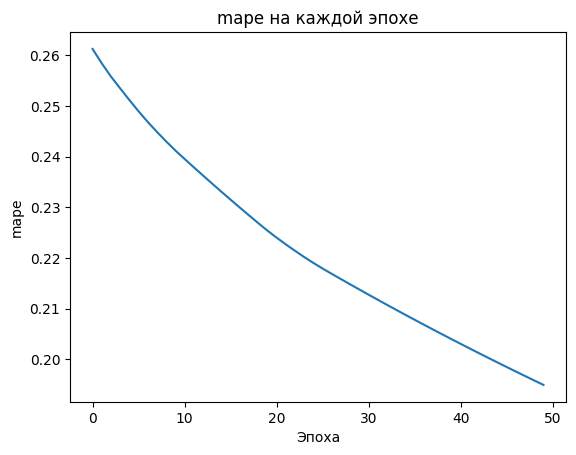

In [120]:
plot_learning_curve(losses)

# __Изобразите на графике точки набора данных (независимой и зависимой переменных) и линию построенной парной регрессии, подписывая оси и рисунок и создавая легенду.__

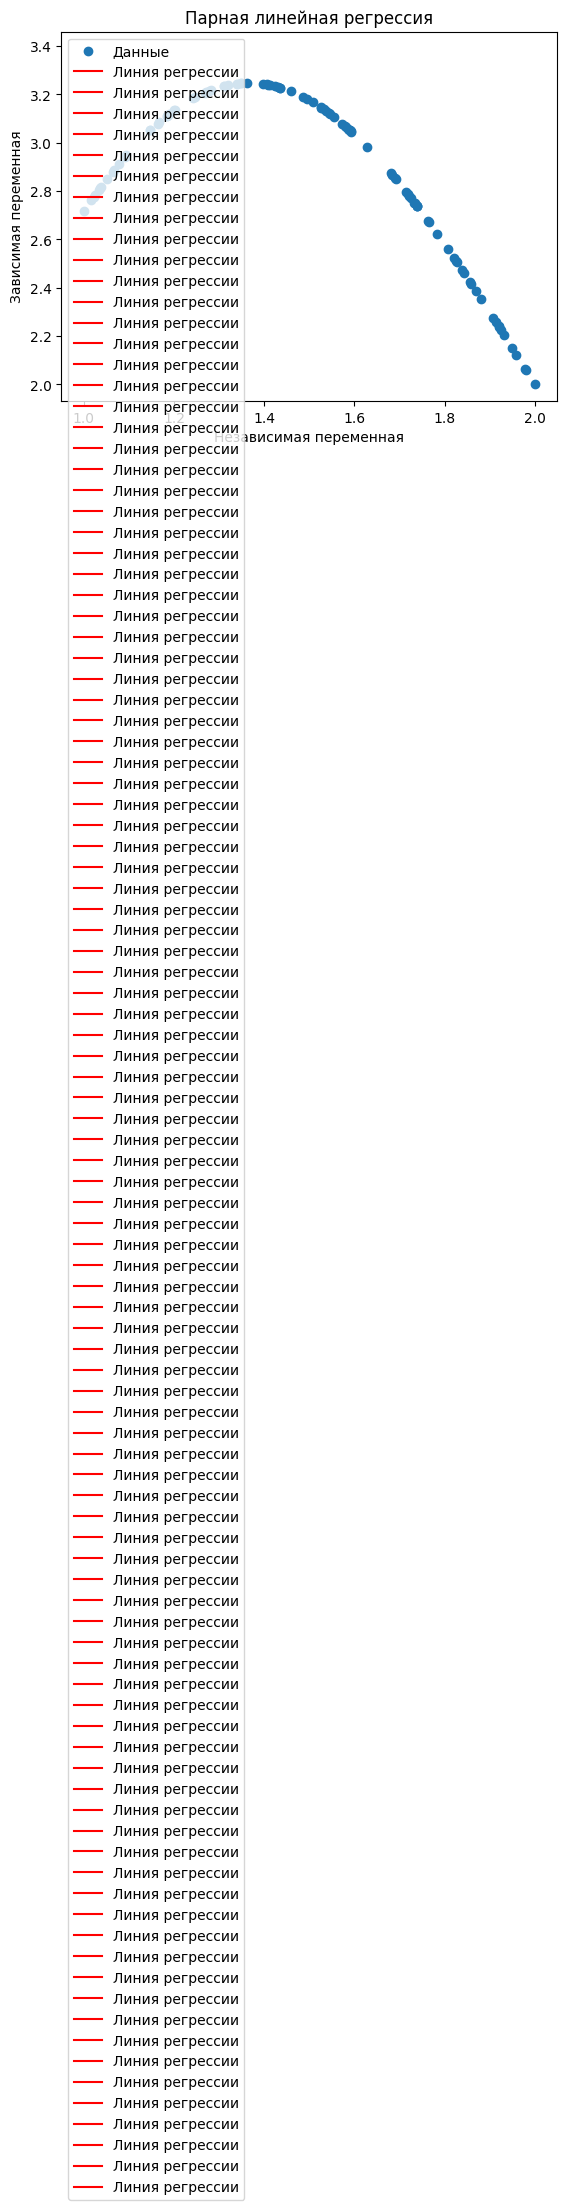

In [121]:
y_pred = model(x_train)
plt.scatter(x_train, y_train, label='Данные')
plt.plot(x_train, y_pred, label='Линия регрессии', color='r') #scatter рисует
plt.xlabel('Независимая переменная')
plt.ylabel('Зависимая переменная')
plt.title('Парная линейная регрессия')
plt.legend()
plt.show()